In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [6]:
data = pd.read_csv(r"C:\Users\Bhargava\Downloads\Ration.csv")

In [5]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [7]:
data.head()

,Sl No.,Mandal,Nov-2017,Dec_2017,Jan_2018,Feb_2018,Mar_2018,Apr_2018,May_2018,June_2018,July_2018,Aug_2018,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Jan_2019,Feb_2019
0,1,Koilkuntla,86.43,87.76,90.70,90.14,91.09,91.59,90.37,91.23,91.74,91.17,91.07,90.56,91.39,91.93,93.07,93.06
1,2,Maddikera East,85.92,86.47,90.01,88.19,87.97,88.95,88.68,88.23,88.60,89.05,87.97,90.28,89.58,89.63,91.18,91.29
2,3,Allagadda,84.05,84.47,87.92,86.79,87.02,87.10,85.42,87.42,87.18,88.67,87.56,88.08,88.91,89.93,91.05,89.99
3,4,Kolimingundla,87.11,87.96,89.90,89.60,88.31,89.36,88.08,89.00,89.34,89.35,88.87,89.24,88.75,89.27,90.88,89.89
4,5,Kallur,84.50,84.82,87.07,87.81,87.09,87.25,86.75,87.72,87.51,88.03,86.47,88.61,88.69,88.62,90.10,88.72


In [17]:
data = data.drop(['Sl No.'],axis=1)

In [18]:
data1 = data.transpose()
#data1.drop(['Sl No.'],axis=1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Mandal,Koilkuntla,Maddikera East,Allagadda,Kolimingundla,Kallur,Dhone,Banaganapalle,Bethamcherla,Chagalamarri,Owk,...,Holagunda,Kosigi,Peddakadubur,Jupadu Bungalow,Mantralayam,Srisailam,Nandavaram,Pagidyala,Kowthalam,Adoni
Nov-2017,86.43,85.92,84.05,87.11,84.5,84.56,84.56,86.48,84.29,85.64,...,77.68,78.51,83.09,77.88,81.79,67.34,81.14,76.04,79.86,75.54
Dec_2017,87.76,86.47,84.47,87.96,84.82,84.77,85.76,87.21,84.57,85.82,...,79.38,77.47,80.88,79.56,80.62,71.75,80.91,78.91,80.12,75.41
Jan_2018,90.7,90.01,87.92,89.9,87.07,87.02,88.21,88.54,87.2,88.42,...,81.97,78.88,83.43,84.05,85.18,74.52,85.42,82.57,81.77,79.04
Feb_2018,90.14,88.19,86.79,89.6,87.81,88.31,87.46,87.57,87.19,87.44,...,81.77,81.82,82.79,81.26,82.04,71.19,81.15,80.02,79.67,78.25


In [82]:
def fun(x):
    if(x=='Jan_2018'):
        return '2018-01'
    if(x=='Feb_2018'):
        return '2018-02'
    if(x=='Mar_2018'):
        return '2018-03'
    if(x=='Apr_2018'):
        return '2018-04'
    if(x=='May_2018'):
        return '2018-05'
    if(x=='Jun_2018'):
        return '2018-06'
    if(x=='Jul_2018'):
        return '2018-07'
    if(x=='Jul_2018'):
        return '2018-08'
    if(x=='Sep_2018'):
        return '2018-09'
    if(x=='Oct_2018'):
        return '2018-10'
    if(x=='Nov_2018'):
        return '2018-11'
    if(x=='Dec_2018'):
        return '2018-12'
    if(x=='Jan_2019'):
        return '2019-01'
    if(x=='Feb_2019'):
        return '2019-02'
    if(x=='Nov_2017'):
        return '2017-11'
    if(x=='Dec_2017'):
        return '2017-12'

In [88]:
y1 = data1[1].copy()
y1 = y1.drop(['Mandal'])
data.index = pd.to_datetime(data.index)
y1_index = data.index.to_period('M')
#ts= ts['Mandal'].map(fun)
ts = data1[0]

ts.columns = ['Mandal', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01','2019-02']
ts.head()

Mandal      Koilkuntla
Nov-2017         86.43
Dec_2017         87.76
Jan_2018          90.7
Feb_2018         90.14
Name: 0, dtype: object

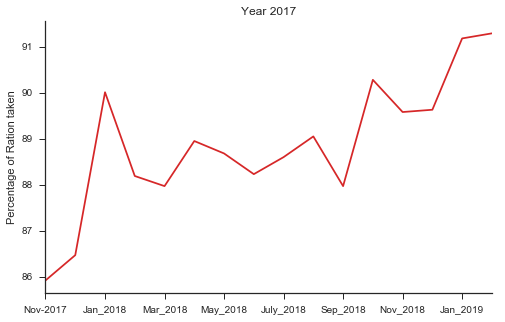

In [48]:
fig, ax= plt.subplots(figsize=(8,5))
y1.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Ration taken')
ax.set_title('Year 2017')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

In [76]:
ts.head()

Nov-2017    86.43
Dec_2017    87.76
Jan_2018     90.7
Feb_2018    90.14
Mar_2018    91.09
Name: 0, dtype: object

In [75]:
decomposition = sm.tsa.x13_arima_analysis(y1)

ValueError: Unknown string format

In [72]:
import forecast
holt = forecast.holt(y1)
holt.fit()
holt.summary()

AttributeError: module 'forecast' has no attribute 'holt'

In [69]:

ahw=forecast.holtwinters(y1, additive=True, damped=False, m=12)
ahw.fit()
ahw.summary()

NameError: name 'forecast' is not defined